In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 파일 불러오기 (local에서 업로드)
from google.colab import files
files.upload()

In [ ]:
df = pd.read_csv('vgames2.csv')
df = df.drop(columns = 'Unnamed: 0')
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [ ]:
df.shape

(16598, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [ ]:
# 결측치 확인

df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [ ]:
df_year = df.sort_values('Year', ascending=False)
df_year

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
6906,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0K,0,0.02
5310,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0,0,0.01,0
15233,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0,0,0.01,0
10107,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0,0,0.03,0
13028,XCOM 2,PS4,2016.0,Strategy,Take-Two Interactive,0.01,0.02,0,0.01
...,...,...,...,...,...,...,...,...,...
16240,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0,0,0
16275,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0M,0.03
16278,Madden NFL 11,Wii,NaN,Sports,Unknown,0.7,0,0,50K
16425,Yoostar on MTV,X360,NaN,Misc,Unknown,0.06,0,0,0


In [ ]:
df_year = df[(df.Year > 2016)]
df_year

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
5310,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0,0,0.01,0
6906,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0K,0,0.02
10107,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0,0,0.03,0
15233,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0,0,0.01,0


In [ ]:
df_year = df[(df.Year < 1981)]
df_year

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
74,Age of Empires III: Complete Collection,PC,9.0,Strategy,Microsoft Game Studios,0.01,0.12,0,0.03
81,Treasures of the Deep,PS,97.0,Action,Namco Bandai Games,0.1,0.07,0,0.01
213,NASCAR Unleashed,PS3,11.0,Racing,Activision,0.09,0,0,0.01
304,Kung Fu Panda: Showdown of Legendary Legends,PS3,15.0,Action,Little Orbit,0,0.02,0,0
768,NASCAR Thunder 2004,PS2,3.0,Racing,Electronic Arts,0.53,0.41,0,0.14
...,...,...,...,...,...,...,...,...,...
15985,Sugoi Hebereke,SNES,94.0,Fighting,Sunsoft,0,0,0.02,0
16103,Fab 5 Soccer,DS,8.0,Sports,Destineer,0.01,0,0,0
16149,Dragon Ball Z: Burst Limit,X360,8.0,Fighting,Atari,0.24,0.18,0.03,0.05
16394,Point Blank 3,PS,0.0,Shooter,Namco Bandai Games,0.01,0.01,0,0


In [ ]:
# 연도, 장르, 공급업체를 임의로 기록할 수 없기 때문에 결측치를 제외 시킨다


# null_y = df[df.Year.isnull() == True]
# null_y


In [ ]:
# null_g = df[df.Genre.isnull() == True]
# null_g


In [ ]:
# null_p = df[df.Publisher.isnull() == True]
# null_p

In [ ]:
# 2017년, 2020년은 제외하고 1981년 ~ 2016년 데이터를 이용해서 게임개발 방향을 잡는다

df_clean = df[(df.Year > 1980) & (df.Year < 2017)].dropna()

df_clean.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [ ]:
df_clean.shape

(16129, 9)

In [ ]:
# 연도별 판매량 : wii sport의 실제 판매량이 8200만 이었고 Data 에서의 합계는 82.74 임으로, k로 표기된 데이터는 1,000단위, 이외 데이터는 모두 1,000,000 단위로 계산 한다

def value_to_float(x):
    if 'K' in x:
            return float(x.replace('K', '')) * 1000

    return float(x.replace('M', '')) * 1000000

df_clean.NA_Sales = pd.to_numeric(df_clean.NA_Sales.apply(value_to_float))
df_clean.EU_Sales = pd.to_numeric(df_clean.EU_Sales.apply(value_to_float))
df_clean.JP_Sales = pd.to_numeric(df_clean.JP_Sales.apply(value_to_float))
df_clean.Other_Sales = pd.to_numeric(df_clean.Other_Sales.apply(value_to_float))


> ## 1. 지역에 따라서 선호하는게임 장르가 다를까?
- 전 기간 지역별 선호게임 장르 비교 : df_genre <br>
1> 장르별, 지역별 출고량 합계계산 : df_genre_total <br>
2> 막대그래프, 히트맵 확인   
<br>
- 최근 5년간 지역별 선호게임 장르 비교<br>
1> 장르별 최근 5년간 데이터 확인 : df_genre --> df_genre_5   
2> 장르별, 지역별 출고량 합계 : df_genre_5   
3> 막대그래프, 히트맵 확인


In [ ]:
loc_columns = df_clean.columns[-4:]
loc_columns

Index(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], dtype='object')

In [ ]:
df_genre = df_clean[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
df_genre

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,40000.0,0.0,0.0,0.0
1,Action,170000.0,0.0,0.0,10000.0
2,Adventure,0.0,0.0,20000.0,0.0
3,Misc,40000.0,0.0,0.0,0.0
4,Platform,120000.0,90000.0,0.0,40000.0
...,...,...,...,...,...
16593,Platform,150000.0,40000.0,0.0,10000.0
16594,Action,10000.0,0.0,0.0,0.0
16595,Sports,440000.0,190000.0,30000.0,130000.0
16596,Action,50000.0,50000.0,250000.0,30000.0


In [ ]:
# 지역별, 장르별 판매량 분석
loc_genre = pd.pivot_table(df_genre, index=['Genre'])
loc_genre = loc_genre.T
loc_genre


Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
EU_Sales,158964.019851,50094.936709,120386.473430,124493.101380,230520.231214,90304.659498,193713.813069,121175.257732,242361.769352,134142.857143,161507.208388,67319.277108
JP_Sales,48300.248139,40973.101266,104335.748792,62213.557289,149387.283237,100698.924731,45839.536807,231072.164948,29494.470774,75547.619048,58794.233290,72484.939759
NA_Sales,265397.022333,80166.139241,264963.768116,235008.998200,511514.450867,216845.878136,292448.304384,211051.546392,445758.293839,215202.380952,290227.173438,102138.554217
Other_Sales,56960.297767,13164.556962,43586.956522,43503.299340,59132.947977,22204.301075,63052.109181,37601.374570,79573.459716,37166.666667,57549.148100,16867.469880


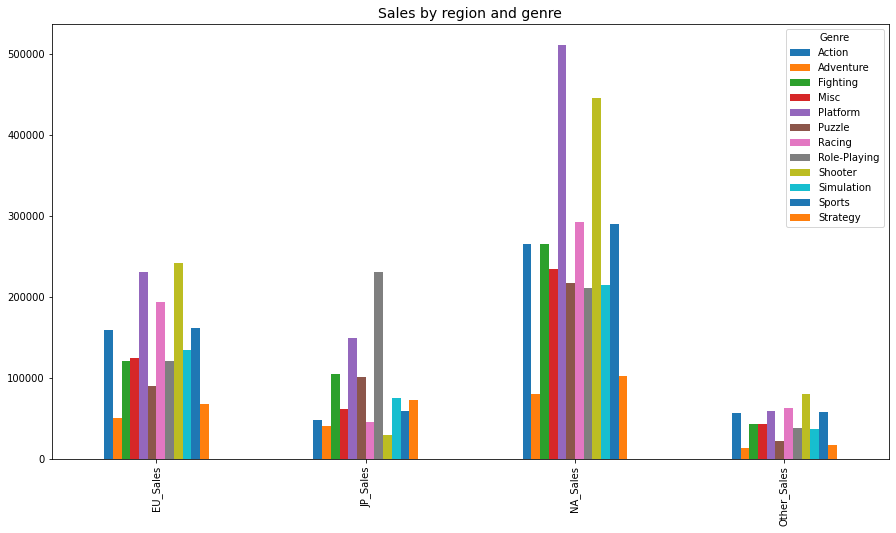

In [ ]:
loc_genre.plot(kind="bar", figsize=(15,8))
plt.legend(loc="upper right", title="Genre", bbox_to_anchor = (1.0, 1.0))

plt.title('Sales by region and genre', fontsize=14)

plt.show()

>유럽은 플랫폼과 슈팅게임을 좀더 선호하고 일본은 롤플레잉 게임의 판매량이 상대적으로 높고, 미국은 플랫폼게임과 슈팅게임을 선호하는 것으로 보여진다.

In [ ]:
# 최근 트렌드가 반영된 보다 정확한 분석을 위해 최근 5년 데이터를 찾아서 비교해 본다.
df_genre_5 = df_clean[['Year', 'Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
df_genre_5

,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,2008.0,Action,40000.0,0.0,0.0,0.0
1,2009.0,Action,170000.0,0.0,0.0,10000.0
2,2010.0,Adventure,0.0,0.0,20000.0,0.0
3,2010.0,Misc,40000.0,0.0,0.0,0.0
4,2010.0,Platform,120000.0,90000.0,0.0,40000.0
...,...,...,...,...,...,...
16593,2006.0,Platform,150000.0,40000.0,0.0,10000.0
16594,2005.0,Action,10000.0,0.0,0.0,0.0
16595,2015.0,Sports,440000.0,190000.0,30000.0,130000.0
16596,2013.0,Action,50000.0,50000.0,250000.0,30000.0


In [ ]:
df_genre_5 = df_genre_5[(df_genre_5.Year > 2011)]
df_genre_5

,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
17,2014.0,Sports,0.0,0.0,30000.0,0.0
18,2015.0,Role-Playing,20000.0,0.0,30000.0,0.0
23,2014.0,Sports,0.0,10000.0,0.0,0.0
24,2013.0,Fighting,480000.0,530000.0,10000.0,230000.0
33,2015.0,Misc,0.0,0.0,10000.0,0.0
...,...,...,...,...,...,...
16576,2015.0,Role-Playing,0.0,0.0,80000.0,0.0
16580,2012.0,Adventure,0.0,30000.0,0.0,0.0
16581,2014.0,Action,130000.0,120000.0,0.0,20000.0
16595,2015.0,Sports,440000.0,190000.0,30000.0,130000.0


In [ ]:
df_genre_5 = df_genre_5.drop(columns='Year')
df_genre_5

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
17,Sports,0.0,0.0,30000.0,0.0
18,Role-Playing,20000.0,0.0,30000.0,0.0
23,Sports,0.0,10000.0,0.0,0.0
24,Fighting,480000.0,530000.0,10000.0,230000.0
33,Misc,0.0,0.0,10000.0,0.0
...,...,...,...,...,...
16576,Role-Playing,0.0,0.0,80000.0,0.0
16580,Adventure,0.0,30000.0,0.0,0.0
16581,Action,130000.0,120000.0,0.0,20000.0
16595,Sports,440000.0,190000.0,30000.0,130000.0


In [ ]:
# 최근 5년간 지역별, 장르별 판매량 분석
loc_genre_5 = pd.pivot_table(df_genre_5, index=['Genre'])
loc_genre_5 = loc_genre_5.T
loc_genre_5

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
EU_Sales,164076.763485,32877.697842,104571.428571,152931.034483,259268.292683,51111.111111,247207.207207,118028.169014,481651.376147,186197.183099,254615.384615,72173.913043
JP_Sales,52842.323651,28561.151079,84761.904762,69597.701149,104634.146341,79259.259259,22432.432432,163126.760563,39128.440367,145211.267606,29461.538462,38840.579710
NA_Sales,178786.307054,30395.683453,186761.904762,217816.091954,307926.829268,42962.962963,150900.900901,152309.859155,611009.174312,108450.704225,296038.461538,60434.782609
Other_Sales,53495.850622,10323.741007,44285.714286,44885.057471,67560.975610,9259.259259,63243.243243,37859.154930,158073.394495,33239.436620,83923.076923,16376.811594


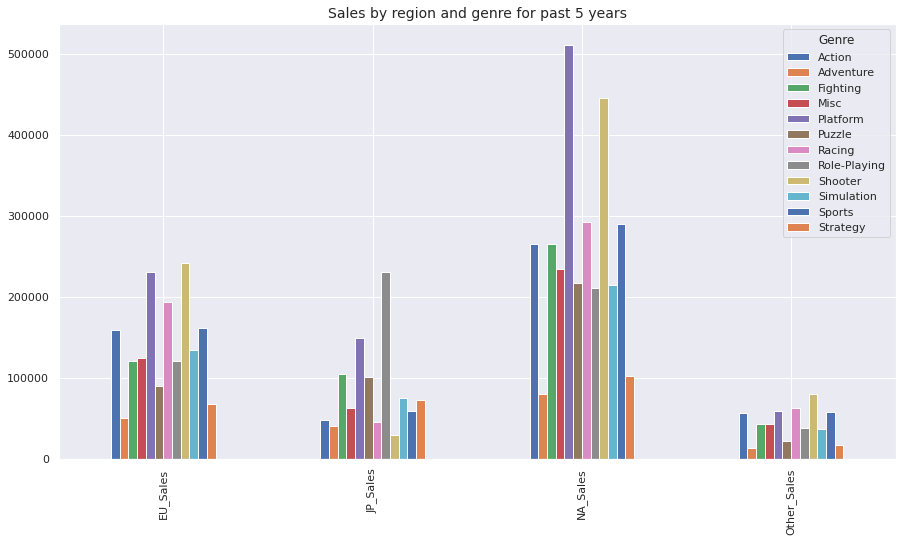

In [ ]:
loc_genre.plot(kind="bar", figsize=(15,8))
plt.legend(loc="upper right", title='Genre', bbox_to_anchor = (1.0, 1.0))

plt.title('Sales by region and genre for past 5 years', fontsize=14)

plt.show()

>최근 5년간의 데이터에서도 유럽은 플랫폼, 슈팅게임을 선호하고 일본은 롤플레잉, 미국은 플랫폼과 슈팅게임을 선호하는 것으로 동일하게 나타났다.<br> 
지역별로 선호하는 게임장르는 구분되어 지는것으로 볼 수 있다.

> ## 2. 연도별 게임의 트렌드가 있을까?
- 연도별 각 장르별 판매량 비교 : df_decade <br>
1> 연도를 기준으로 장르별 계산 : df_genre_total <br>
2> 각 장르별 선 그래프로 비교   
<br>
- 플랫폼 별(PC 게임, 콘솔게임) 연도별 트렌드 비교<br>
1> pc 게임과 콘솔게임의 연도별 변화 : df_plat
2> 두 차이 비교 : 선 그래프


In [ ]:
# 게임별 판매량 합계 Column 추가
df_clean['Total_Sales'] = df_clean[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=1)
df_clean

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40000.0,0.0,0.0,0.0,40000.0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,170000.0,0.0,0.0,10000.0,180000.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,20000.0,0.0,20000.0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40000.0,0.0,0.0,0.0,40000.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120000.0,90000.0,0.0,40000.0,250000.0
...,...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,150000.0,40000.0,0.0,10000.0,200000.0
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,10000.0,0.0,0.0,0.0,10000.0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,440000.0,190000.0,30000.0,130000.0,790000.0
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,50000.0,50000.0,250000.0,30000.0,380000.0


In [ ]:
df_clean.to_csv('df_clean.csv')

In [ ]:
# 연도별 판매량 계산

df_decade = df_clean[['Year','Genre', 'Total_Sales']]
df_decade = df_decade.sort_values('Year')
df_decade

,Year,Genre,Total_Sales
820,1981.0,Action,340000.0
1706,1981.0,Shooter,1350000.0
2618,1981.0,Sports,130000.0
14738,1981.0,Action,930000.0
13452,1981.0,Platform,1460000.0
...,...,...,...
11697,2016.0,Sports,230000.0
10457,2016.0,Adventure,40000.0
13912,2016.0,Role-Playing,90000.0
8221,2016.0,Action,90000.0


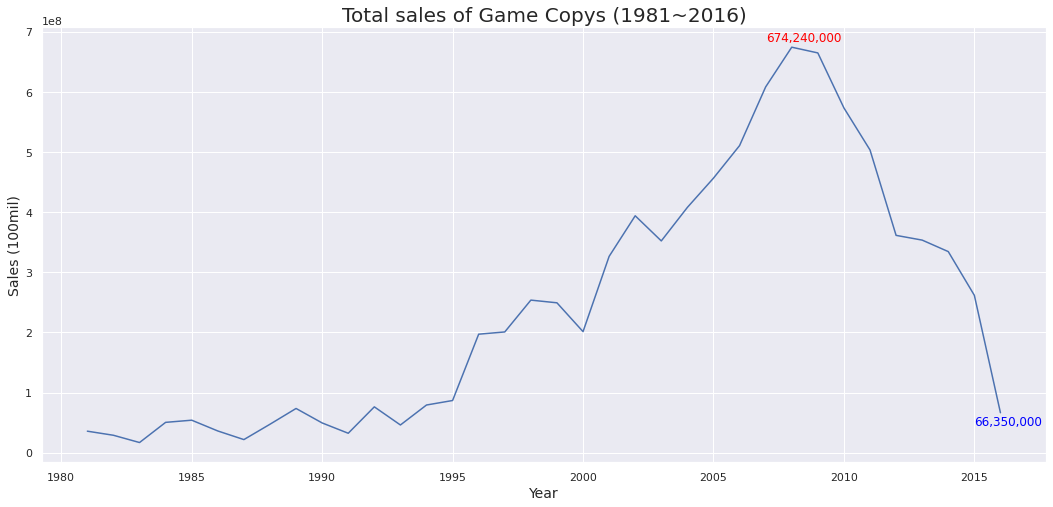

In [ ]:
# 연도별 판매량 분석

yearly = df_decade.groupby('Year').sum()
df_yearly = yearly.reset_index()

import seaborn as sns

sns.set()
sns.set_style(style=None, rc=None)
plt.figure(figsize = (18,8))

ax = sns.lineplot(x='Year', y='Total_Sales', data=yearly, ci=None)
plt.title('Total sales of Game Copys (1981~2016)', fontsize=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Sales (100mil)', fontsize=14)
plt.text(2007 ,674240000 + 10000000, '674,240,000', color='Red')
plt.text(2016 -1 ,66350000 - 20000000, '66,350,000', color='Blue')

plt.show()


In [ ]:
df_yearly

,Year,Total_Sales
0,1981.0,35680000.0
1,1982.0,28880000.0
2,1983.0,16800000.0
3,1984.0,50350000.0
4,1985.0,53950000.0
5,1986.0,36030000.0
6,1987.0,21700000.0
7,1988.0,47210000.0
8,1989.0,73450000.0
9,1990.0,49370000.0


In [ ]:
# 장르에 따른 연도별 판매량 합계 계산

df_g_g = df_decade.groupby(['Genre', 'Year']).sum()
df_g_d = df_g_g.reset_index()
df_g_d

,Genre,Year,Total_Sales
0,Action,1981.0,14790000.0
1,Action,1982.0,6500000.0
2,Action,1983.0,2860000.0
3,Action,1984.0,1850000.0
4,Action,1985.0,3520000.0
...,...,...,...
376,Strategy,2012.0,3330000.0
377,Strategy,2013.0,6320000.0
378,Strategy,2014.0,970000.0
379,Strategy,2015.0,1820000.0


In [ ]:
# 연도에 따른 장르별 판매량 합계 계산
df_g_y = df_decade.groupby(['Year','Genre']).sum()
df_g_f = df_g_y.reset_index()

id = df_g_f.Year
df_g_f.index = id
df_g_f = df_g_f.drop(columns='Year')

df_g_f

,Genre,Total_Sales
Year,,
1981.0,Action,14790000.0
1981.0,Platform,6920000.0
1981.0,Puzzle,2250000.0
1981.0,Racing,480000.0
1981.0,Shooter,10020000.0
...,...,...
2016.0,Role-Playing,6750000.0
2016.0,Shooter,13970000.0
2016.0,Simulation,390000.0


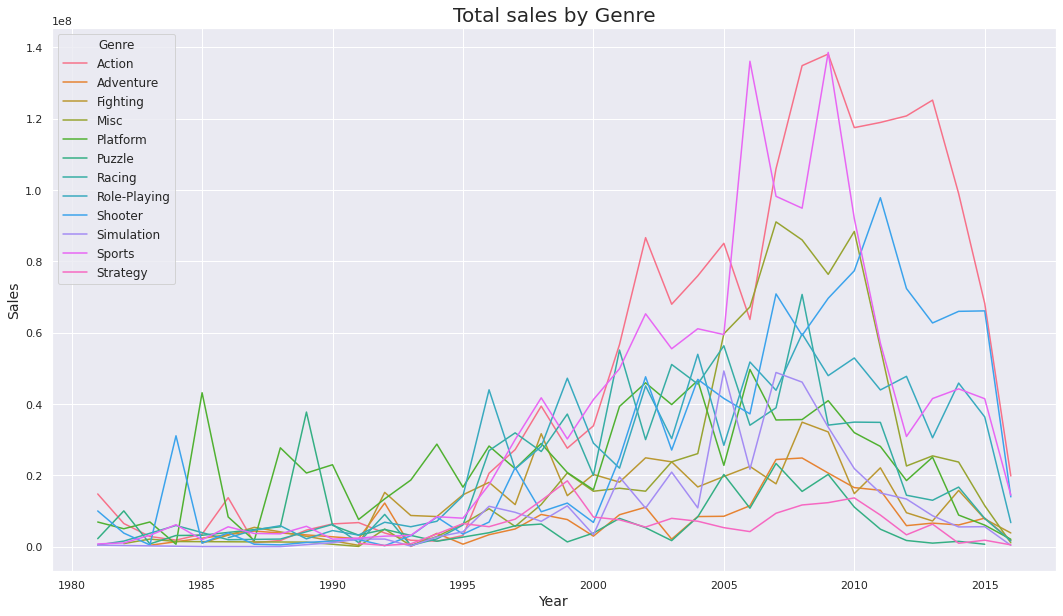

In [ ]:
# 연도에 따른 장르별 판매량 그래프

import seaborn as sns

sns.set()
sns.set_style(style=None, rc=None)
plt.figure(figsize = (18,10))

ax = sns.lineplot(x='Year', y='Total_Sales', hue='Genre', data=df_g_g, ci=None)

plt.title('Total sales by Genre', fontsize=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.legend(fontsize=12, title='Genre', loc='best')

plt.show()

In [ ]:
df_heat = df_g_d.pivot('Genre', 'Year', 'Total_Sales').fillna(0)
df_heat

Year,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,1990.0,...,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
Genre,,,,,,,,,,,,,,,,,,,,,
Action,14790000.0,6500000.0,2860000.0,1850000.0,3520000.0,13740000.0,1110000.0,1740000.0,4650000.0,6390000.0,...,105990000.0,134880000.0,138130000.0,117500000.0,118950000.0,120780000.0,125210000.0,99010000.0,68200000.0,19830000.0
Adventure,0.0,0.0,400000.0,0.0,0.0,0.0,4380000.0,0.0,0.0,0.0,...,24440000.0,24870000.0,20650000.0,16570000.0,15820000.0,5900000.0,6610000.0,6090000.0,8010000.0,1790000.0
Fighting,0.0,0.0,0.0,0.0,1050000.0,0.0,5420000.0,0.0,0.0,0.0,...,17630000.0,34910000.0,32180000.0,14880000.0,22110000.0,9530000.0,7210000.0,15770000.0,7780000.0,3850000.0
Misc,0.0,870000.0,2140000.0,1450000.0,0.0,0.0,0.0,0.0,1280000.0,0.0,...,91070000.0,86010000.0,76360000.0,88400000.0,55770000.0,22630000.0,25470000.0,23730000.0,11510000.0,1090000.0
Platform,6920000.0,5030000.0,6930000.0,690000.0,43170000.0,8340000.0,1740000.0,27730000.0,20660000.0,22980000.0,...,35530000.0,35650000.0,40950000.0,31980000.0,28120000.0,18540000.0,25090000.0,8870000.0,6050000.0,2080000.0
Puzzle,2250000.0,10040000.0,780000.0,3140000.0,3210000.0,0.0,0.0,5580000.0,37750000.0,5990000.0,...,23340000.0,15500000.0,20270000.0,11110000.0,4910000.0,1740000.0,1000000.0,1500000.0,690000.0,0.0
Racing,480000.0,1570000.0,0.0,5950000.0,0.0,1960000.0,0.0,2140000.0,0.0,6250000.0,...,38940000.0,70730000.0,34090000.0,34930000.0,34860000.0,14430000.0,13020000.0,16710000.0,7920000.0,1620000.0
Role-Playing,0.0,0.0,0.0,0.0,0.0,2520000.0,4650000.0,5880000.0,2200000.0,4520000.0,...,43860000.0,59690000.0,47960000.0,52910000.0,43950000.0,47770000.0,30540000.0,45880000.0,36380000.0,6750000.0
Shooter,10020000.0,3810000.0,490000.0,31100000.0,1000000.0,3890000.0,690000.0,510000.0,1190000.0,0.0,...,70880000.0,59250000.0,69650000.0,77360000.0,97850000.0,72380000.0,62730000.0,65990000.0,66120000.0,13970000.0


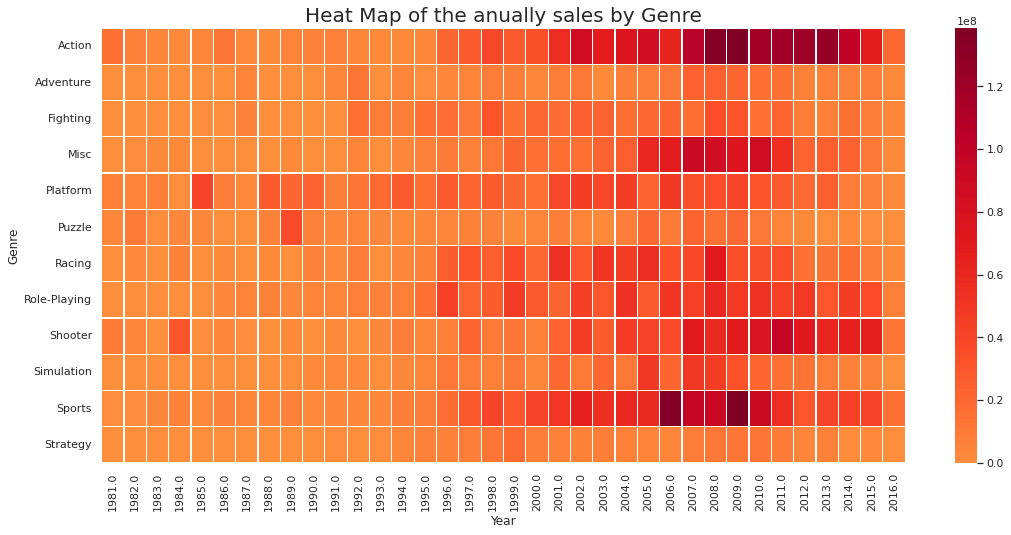

In [ ]:
plt.figure(figsize = (18,8))
plt.title('Heat Map of the anually sales by Genre', fontsize=20)
ax= sns.heatmap(df_heat, center=0.7, linewidths=0.2, cmap='YlOrRd')

> 

> 히트맵을 통해 보면, 1980년~90대는 특별히 눈에띄는 장르가 없지만, 2000년에 들어와서는 액션, 스포츠, 전략게임의 판매 비중이 높아졌다. 연도별 게임의 트렌드는 계속 변화하고 있다.
스포츠, 전략게임은 기술의 발전으로 네트웍 유저간의 대결, 공간 시뮬레이션 등이 가능해지면서 새로운 소재들을 발굴하면서 시장을 더 확대시켰다. 

>## 3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스
- 출고량 기준으로 Top10 게임 확인
- 장르, 지역별 판매량 비교
- 최근 5년간 Top10 게임 확인
- 장르, 지역별 판매량 비교

In [ ]:
# 매출 순위에 따라 상위 10개 게임 분류

df_10 = df_clean.sort_values('Total_Sales', ascending=False)

In [ ]:
df_10

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2908,Wii Sports,Wii,2006.0,Sports,Nintendo,41490000.0,29020000.0,3770000.0,8460000.0,82740000.0
4199,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29080000.0,3580000.0,6810000.0,770000.0,40240000.0
12579,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15850000.0,12880000.0,3790000.0,3310000.0,35830000.0
3352,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15750000.0,11010000.0,3280000.0,2960000.0,33000000.0
7829,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11270000.0,8890000.0,10220000.0,1000000.0,31380000.0
...,...,...,...,...,...,...,...,...,...,...
11517,Dr. Slump & Arale-Chan,DS,2008.0,Adventure,Namco Bandai Games,0.0,0.0,10000.0,0.0,10000.0
4574,Shirogane no Soleil: Contract to the Future - ...,PS2,2008.0,Adventure,Russel,0.0,0.0,10000.0,0.0,10000.0
4571,Alone in the Dark,PC,2008.0,Adventure,Atari,0.0,10000.0,0.0,0.0,10000.0
7357,Ratchet & Clank: Full Frontal Assault,PSV,2012.0,Adventure,Sony Computer Entertainment,10000.0,0.0,0.0,0.0,10000.0


In [ ]:
df_10 = df_10[['Name', 'Genre','Platform', 'Total_Sales']].head(10)

df_10

,Name,Genre,Platform,Total_Sales
2908,Wii Sports,Sports,Wii,82740000.0
4199,Super Mario Bros.,Platform,NES,40240000.0
12579,Mario Kart Wii,Racing,Wii,35830000.0
3352,Wii Sports Resort,Sports,Wii,33000000.0
7829,Pokemon Red/Pokemon Blue,Role-Playing,GB,31380000.0
1203,Tetris,Puzzle,GB,30260000.0
6937,New Super Mario Bros.,Platform,DS,30010000.0
3014,Wii Play,Misc,Wii,29010000.0
16531,New Super Mario Bros. Wii,Platform,Wii,28610000.0
10488,Duck Hunt,Shooter,NES,28310000.0


In [ ]:
# 동일한 게임인데 플랫폼별로 판매량이 계산되는 경우가 있어서, 게임명 기준으로 판매량을 다시 계산해서 Top10 분류
i_lst = [1,2,3,4,5,6,7,8,9,10]

df_10_g = df_10.groupby(['Name', 'Genre', 'Platform']).sum().sort_values('Total_Sales', ascending=False).head(10)
df_10_g = df_10_g.reset_index()
df_10_g['Rank'] = i_lst
df_10_g = df_10_g.set_index('Rank')

df_10_g

,Name,Genre,Platform,Total_Sales
Rank,,,,
1,Wii Sports,Sports,Wii,82740000.0
2,Super Mario Bros.,Platform,NES,40240000.0
3,Mario Kart Wii,Racing,Wii,35830000.0
4,Wii Sports Resort,Sports,Wii,33000000.0
5,Pokemon Red/Pokemon Blue,Role-Playing,GB,31380000.0
6,Tetris,Puzzle,GB,30260000.0
7,New Super Mario Bros.,Platform,DS,30010000.0
8,Wii Play,Misc,Wii,29010000.0
9,New Super Mario Bros. Wii,Platform,Wii,28610000.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


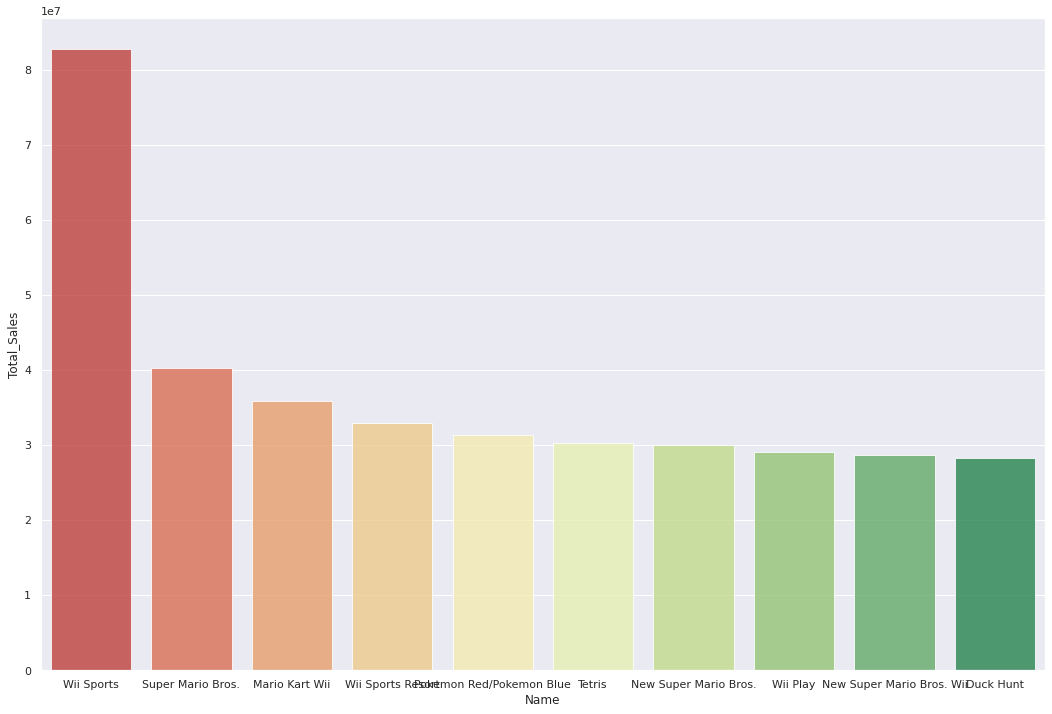

In [ ]:
# Top 10 판매량의 게임

x = df_10_g.Name
y = df_10_g.Total_Sales

plt.figure(figsize = (18,12))
sns.barplot(x, y, alpha=0.8, palette='RdYlGn')

plt.show()

> 1981년 ~ 2016년 전기간의 게임의 TOP10은 이와 같다. 재밌는 사실은 Top 10 게임은 모두 닌텐도에서 출시한 게임이라는 점이다.

In [ ]:
# 최신 트렌드를 정확하게 확인하기 위해서 최근 10년간의 Top10 게임을 추가로 분석해 보았다.

df_10_10 = df_clean[(df_clean['Year'] > 2006)].sort_values('Total_Sales', ascending=False)
df_10_10 = df_10_10[['Name', 'Genre', 'Platform', 'Total_Sales']]

df_10_10 = df_10_10.groupby(['Name']).sum().sort_values('Total_Sales', ascending=False).head(10)
df_10_10 = df_10_10.reset_index()
df_10_10['Rank'] = i_lst
df_10_10 = df_10_10.set_index('Rank')
df_10_10

,Name,Total_Sales
Rank,,
1,Grand Theft Auto V,55920000.0
2,Mario Kart Wii,35830000.0
3,Wii Sports Resort,33000000.0
4,Call of Duty: Modern Warfare 3,30840000.0
5,Call of Duty: Black Ops II,29730000.0
6,Call of Duty: Black Ops,29410000.0
7,New Super Mario Bros. Wii,28610000.0
8,Call of Duty: Ghosts,27370000.0
9,Call of Duty: Black Ops 3,25300000.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


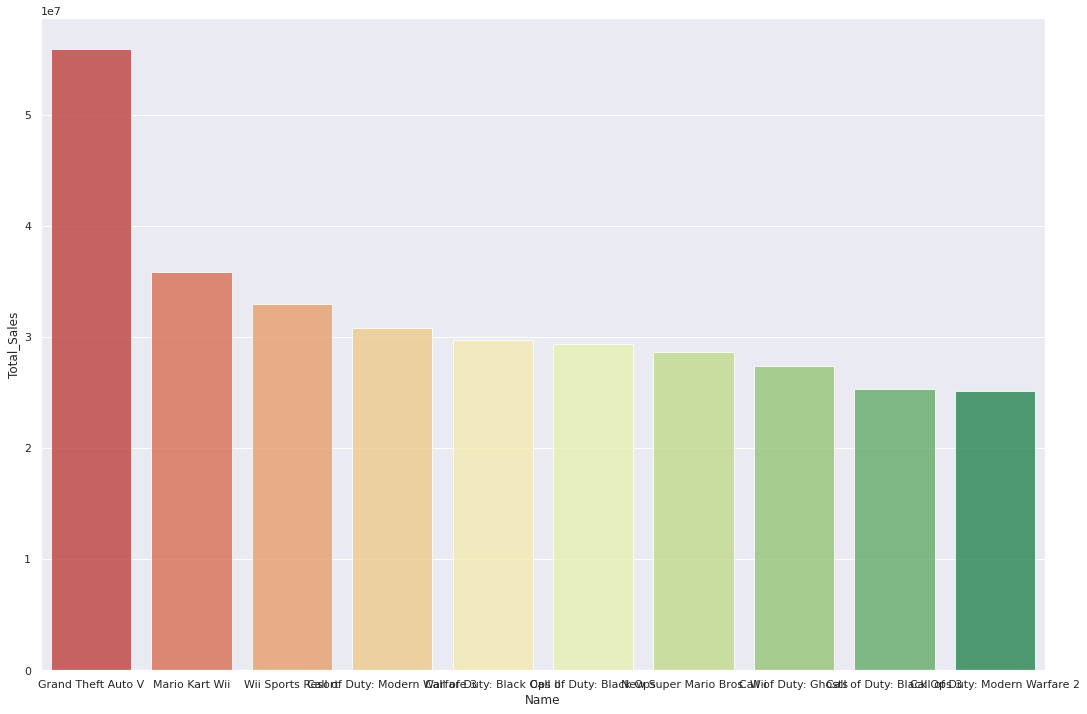

In [ ]:
x_10 = df_10_10.Name
y_10 = df_10_10.Total_Sales

plt.figure(figsize = (18,12))
sns.barplot(x_10, y_10, alpha=0.8, palette='RdYlGn')

plt.show()

> 총 판매량 TOP10에는 80년대, 90년대 게임들이 있어서 최근의 게임시장 분석을 하기에 적합하지 않다고 보여진다. 이에 현재시장을 확인하기 위해 최근 10년간의 판매량 TOP10을 다시 확인해 보았더니, 최근 트렌드에 맞게 액션, 슈팅, 스포츠 게임이 상위 판매량을 나타내고 있다.<br>
동일 게임인데 플랫폼으로 판매량이 나누어진 게임은 모든 플랫폼의 총 판매량으로 계산을 했다.

In [ ]:
TotalSum = df_10_g.Total_Sales.sum()
Total_10_Sum = df_10_10.Total_Sales.sum()

print('Difference of Sales : ' , format(int(TotalSum - Total_10_Sum), ',d'))

Difference of Sales :  48,280,000


>35년간의 Top 10의 총판매량 보다 최근 10년간 Top10 의 총 판매량이 4천8백만개가 적다. 이러한 차이를 보고 아래의 두개의 가설을 세울 수 있다
1. 최근 게임시장 규모가 줄어들어서 판매량이 줄었다.
2. 다양한 게임 출시로 판매량이 분산 되었다. <br>

>이러한 가설을 검증하기 위해 총 게임중 최근 10년간 출시된 게임의 수를 확인할 필요가 있다.<br>
전체 기간은 35년이므로 최근 10년간 출시된 게임의 비율이 10/35, 즉 28.5% 이상이라면 2번의 가설이 맞다고 판단할 수 있다.

In [ ]:
Total_count = df_clean.groupby(['Name']).sum().sort_values('Total_Sales', ascending=False).Total_Sales.count()
Total_count

11231

In [ ]:
Total_10_count = df_clean[(df_clean.Year > 2006)].groupby(['Name']).sum().sort_values('Total_Sales', ascending=False).Total_Sales.count()
Total_10_count

5948

In [ ]:
print('Recent Game Ratio :', round(Total_10_count/Total_count,4) *100,'%')

Recent Game Ratio : 52.959999999999994 %


In [ ]:
sales_35 = df_clean.Total_Sales.sum()
sales_10 = df_clean[(df_clean.Year > 2006)].Total_Sales.sum()

print('Recent sales Ratio :', round(sales_10/sales_35,4) * 100, '%')

Recent sales Ratio : 50.68 %


> 최근 10년간 출시된 게임수는 전체 게임중 52.9% 이고 최근 10년간 판매량은 총 판매량의 50.68% 로 나타났다. 이러한 결과는 이전에 비해서 게임의 다양성이 높아지면서 일부 인기게임에 집중되는 현상이 줄어들고 있다고 판단할 수 있다.